<a href="https://colab.research.google.com/github/JuanFdoGf/MachineLearningProjects/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
sns.set(style='whitegrid')

## Cargar el conjunto de datos

In [2]:
path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Path to dataset files:', path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


## Inspección y Exploración del conjunto de datos

In [3]:
train_path = os.path.join(path, 'Titanic-Dataset.csv')

df = pd.read_csv(train_path)

In [4]:
# Inspepcción de los datos
print('Primeras filas del dataset:')
print(df.head())

print('\nInformación general del dataset:')
print(df.info())

print('\nDescripción estadística del dataset:')
print(df.describe(include='all'))

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [5]:
# Verificar valores nulos
def missing_values_summary(df):
    missing_summary = df.isnull().sum()
    missing_summary = missing_summary[missing_summary > 0]
    return missing_summary.sort_values(ascending=False)

print('\nValores nulos por columna:')
print(missing_values_summary(df))


Valores nulos por columna:
Cabin       687
Age         177
Embarked      2
dtype: int64


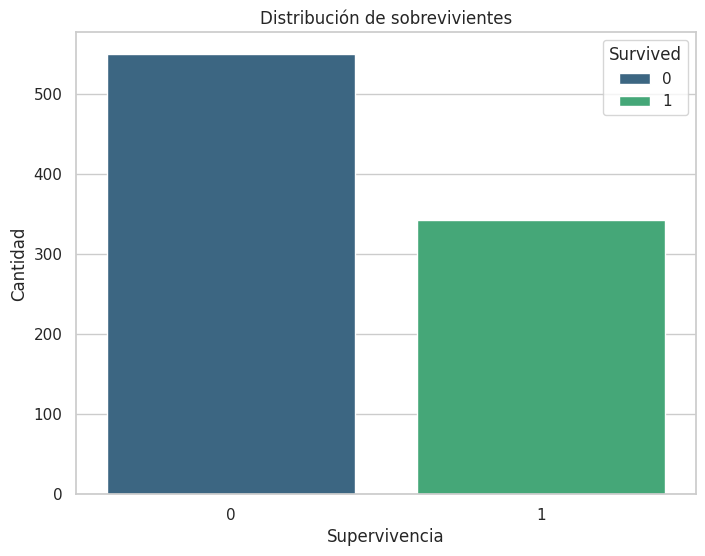

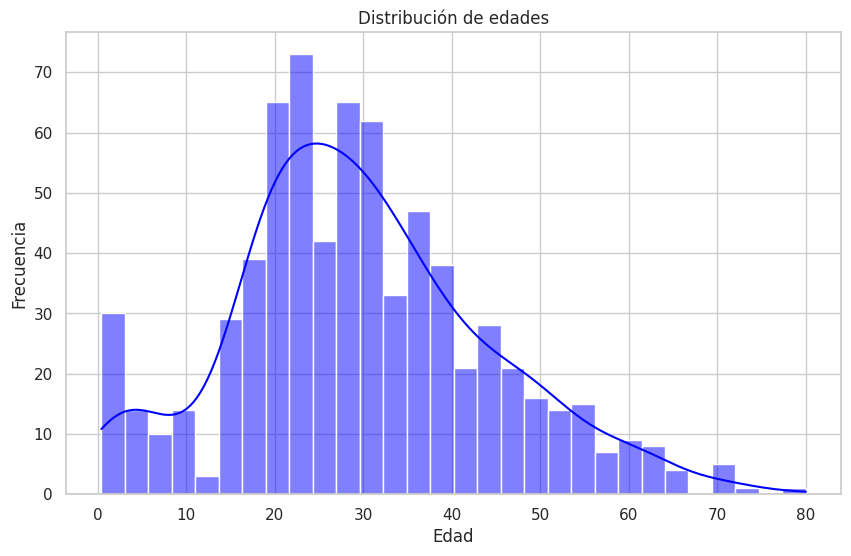

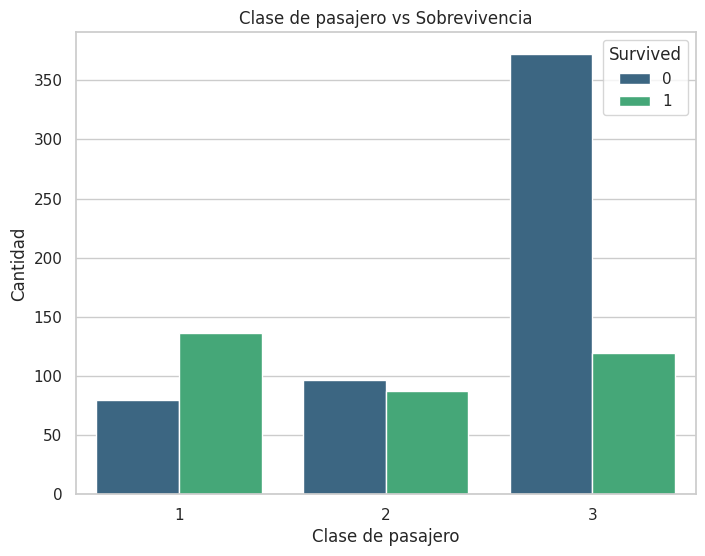

In [6]:
# Gráfico de sobrevivientes vs No sobrevivientes
plt.figure(figsize=(8, 6))
sns.countplot(data=df,
              x='Survived',
              hue= 'Survived',
              palette='viridis')
plt.title('Distribución de sobrevivientes')
plt.xlabel('Supervivencia')
plt.ylabel('Cantidad')
plt.show()

# Distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(data=df,
             x='Age',
             bins=30,
             kde=True,
             color='blue')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre clase de pasajero y sobrevivencia
plt.figure(figsize=(8, 6))
sns.countplot(data=df,
              x='Pclass',
              hue='Survived',
              palette='viridis')
plt.title('Clase de pasajero vs Sobrevivencia')
plt.xlabel('Clase de pasajero')
plt.ylabel('Cantidad')
plt.show()

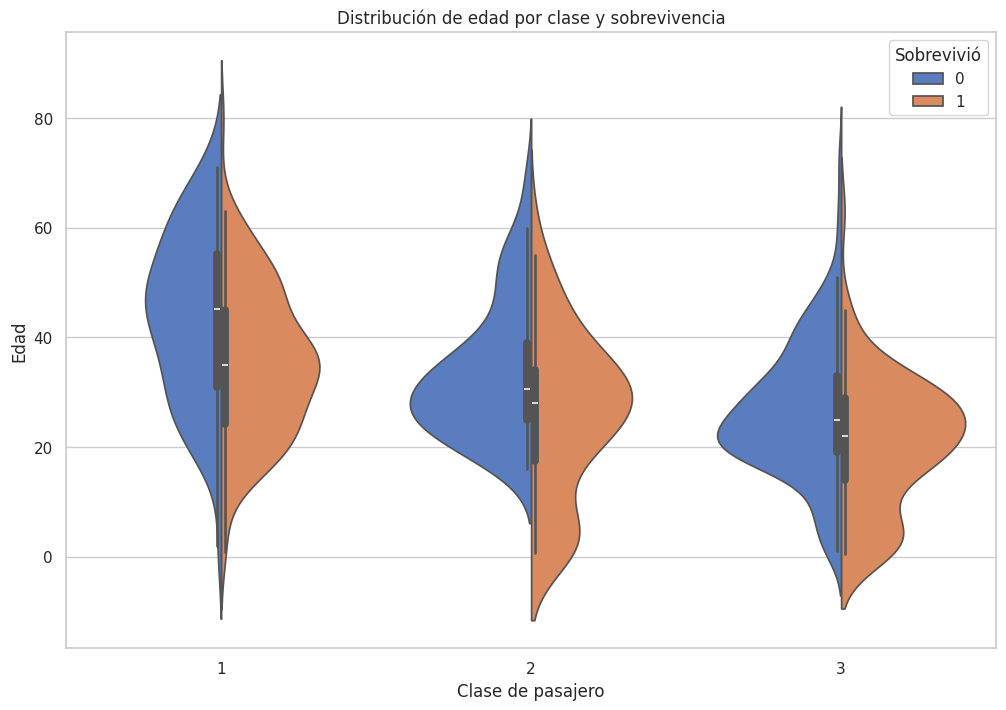

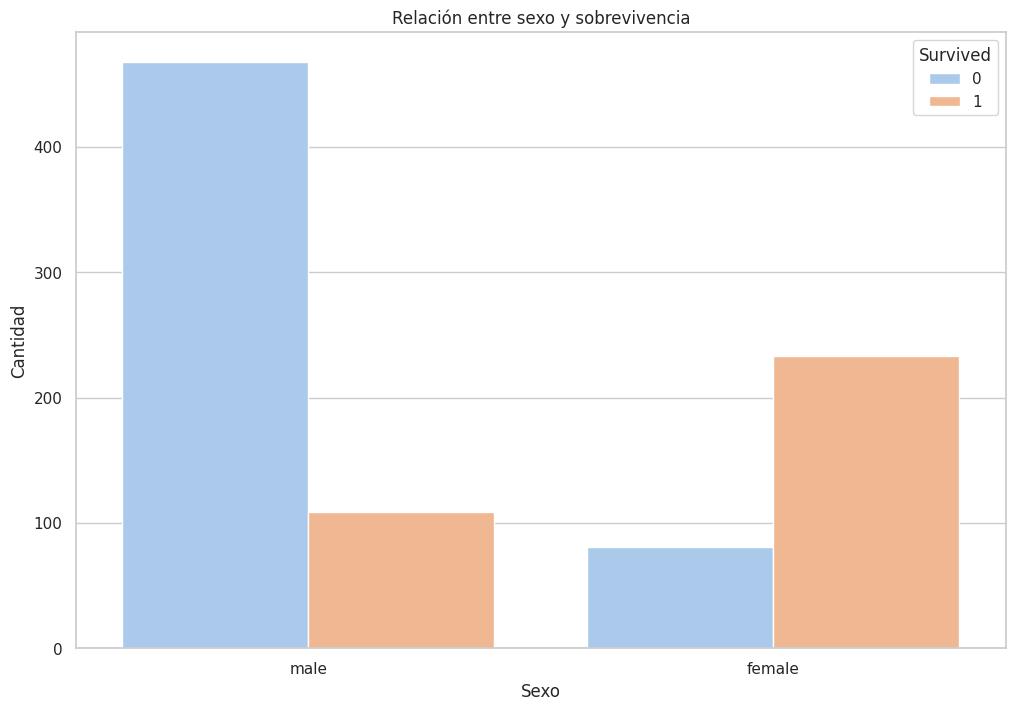

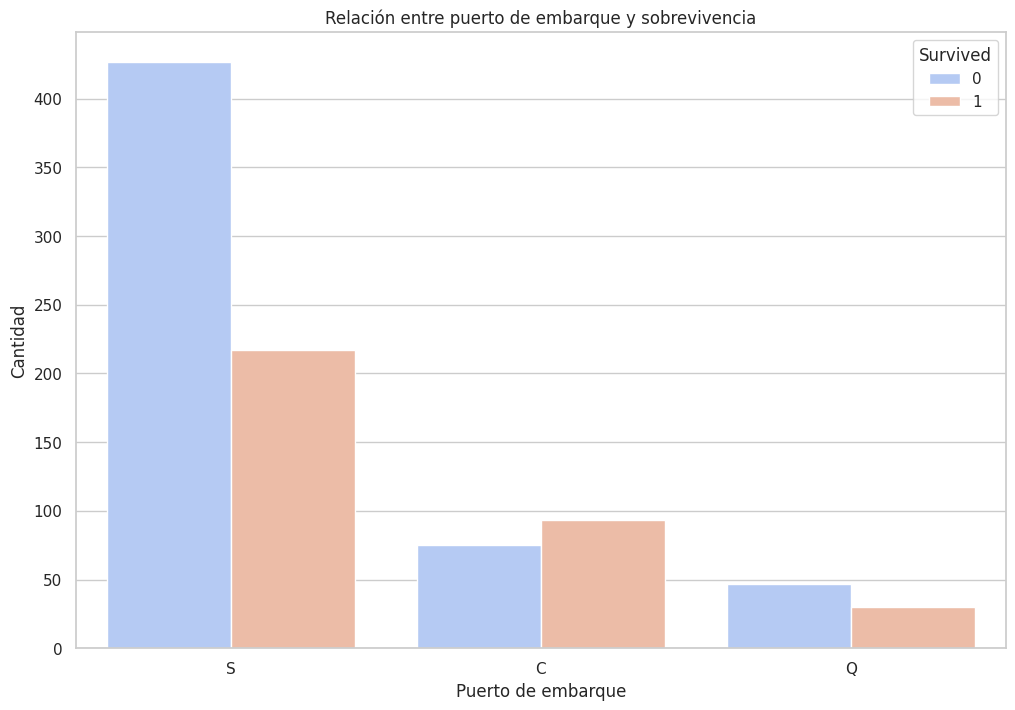

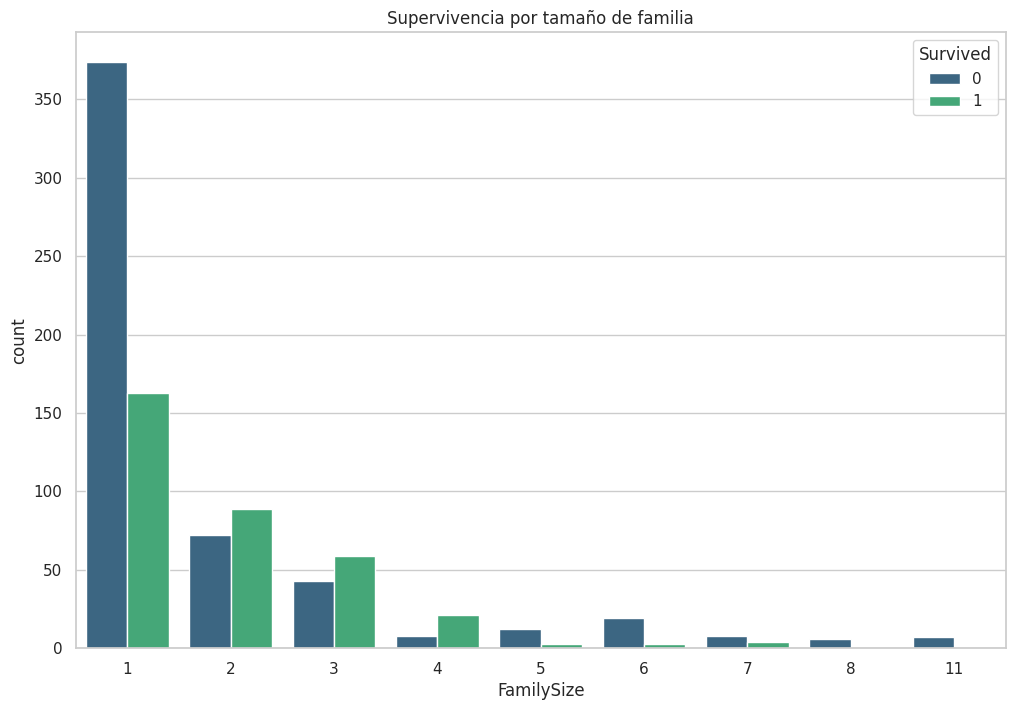

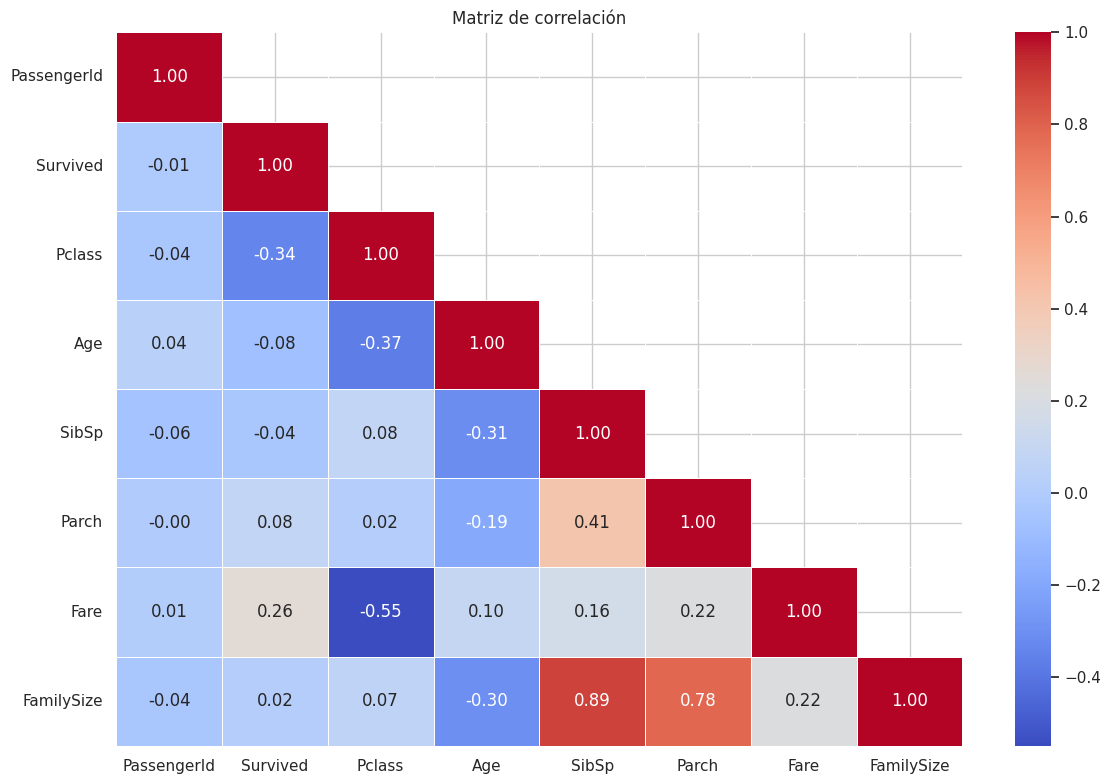

In [7]:
# Relación entre edad y clase respecto a sobrevivencia
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True, palette="muted")
plt.title("Distribución de edad por clase y sobrevivencia")
plt.xlabel("Clase de pasajero")
plt.ylabel("Edad")
plt.legend(title="Sobrevivió", loc="upper right")
plt.show()

# Relación entre sexo y embarque respecto a sobrevivencia
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Sex", hue="Survived", palette="pastel", dodge=True)
plt.title("Relación entre sexo y sobrevivencia")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Embarked", hue="Survived", palette="coolwarm", dodge=True)
plt.title("Relación entre puerto de embarque y sobrevivencia")
plt.xlabel("Puerto de embarque")
plt.ylabel("Cantidad")
plt.show()

# Análisis de familiares
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='viridis')
plt.title('Supervivencia por tamaño de familia')
plt.show()

# Análisis de correlaciones
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap='coolwarm',
    fmt='.2f',
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1),
    linewidths=0.5
)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

In [8]:
print("\n=== INSIGHTS PRINCIPALES ===")
print("1. Tasa de supervivencia general:", df['Survived'].mean())
print("\n2. Tasa de supervivencia por género:")
print(df.groupby('Sex')['Survived'].mean())
print("\n3. Tasa de supervivencia por clase:")
print(df.groupby('Pclass')['Survived'].mean())
print("\n4. Edad promedio de sobrevivientes vs no sobrevivientes:")
print(df.groupby('Survived')['Age'].mean())


=== INSIGHTS PRINCIPALES ===
1. Tasa de supervivencia general: 0.3838383838383838

2. Tasa de supervivencia por género:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

3. Tasa de supervivencia por clase:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

4. Edad promedio de sobrevivientes vs no sobrevivientes:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


# Análisis Exploratorio de los Datos.

## Observaciones del Análisis Preliminar

### 1. Distribución de Sobrevivientes
La distribución de sobrevivientes revela una predominancia de fallecimientos sobre supervivencias, lo cual establece una línea base importante para el análisis predictivo. Esta asimetría en la variable objetivo sugiere la necesidad de considerar técnicas para manejar el desbalanceo de clases en el modelo.

### 2. Estructura Demográfica por Edad
El análisis de la distribución etaria muestra una concentración significativa de pasajeros entre los 20 y 40 años, con presencia notable de grupos infantiles. Esta distribución bimodal sugiere patrones familiares en el conjunto de pasajeros, lo cual podría ser relevante para entender las dinámicas de supervivencia.

### 3. Impacto de la Clase Socioeconómica
Se evidencia una correlación significativa entre la clase del pasajero y su probabilidad de supervivencia, con una ventaja marcada para los pasajeros de primera clase. Este patrón podría estar relacionado con:
- Ubicación de los compartimientos en el barco
- Acceso prioritario a botes salvavidas
- Proximidad a las rutas de evacuación

### 4. Análisis Multivariado de Edad, Clase y Supervivencia
El diagrama de violín revela patrones complejos de interacción:
- Los pasajeros de primera clase presentan una edad promedio mayor y mejores tasas de supervivencia
- Las clases inferiores muestran una distribución más joven de pasajeros, con tasas de supervivencia más variables
- La edad parece tener un efecto moderador en la relación entre clase social y supervivencia

### 5. Diferencias por Género
Los datos confirman un fuerte sesgo de género en la supervivencia, con una tasa significativamente mayor para mujeres. Este patrón refleja la política de evacuación "mujeres y niños primero", constituyendo uno de los predictores más robustos para el modelo.

### 6. Influencia del Puerto de Embarque
Se observan variaciones en las tasas de supervivencia según el puerto de embarque, aunque estas diferencias podrían ser consecuencia de:
- La composición socioeconómica de los pasajeros en cada puerto
- La distribución de clases de boletos vendidos por ubicación
- Patrones demográficos específicos de cada punto de embarque

## Preparación del Dataset

In [9]:
# Manejo de valores nulos
print('Valores nulos por columna')
print(df.isnull().sum())

Valores nulos por columna
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64
